C:\Users\Cade\AppData\Local\Temp\ipykernel_16412\2608280482.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_cmap = cm.get_cmap('jet')


<Figure size 1920x1440 with 0 Axes>

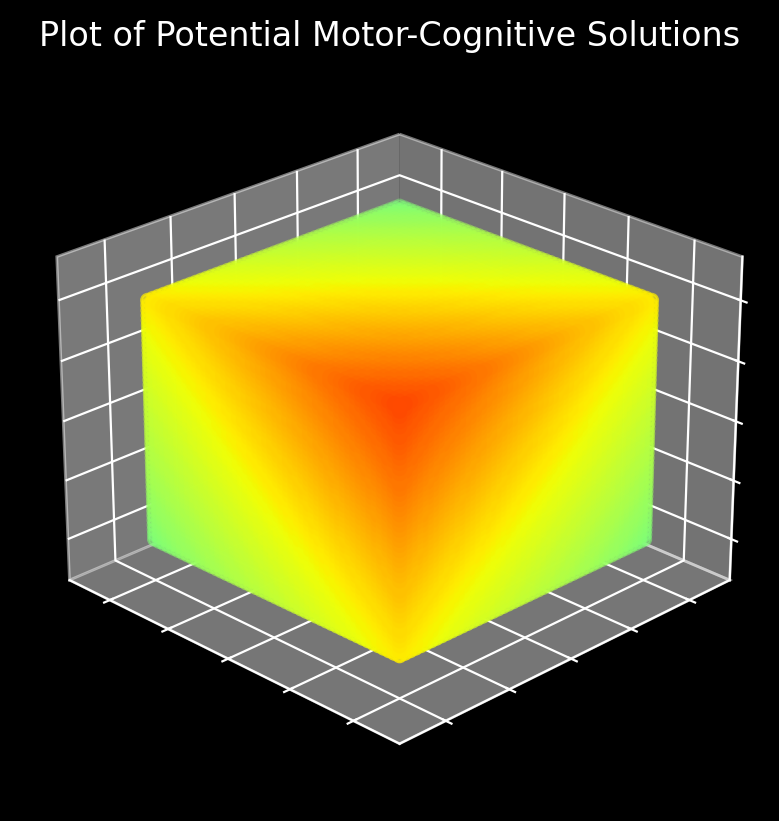

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from matplotlib.colors import ListedColormap

## The following code creates the figure plotting function
def MakePlot(xx,yy,zz,ww,cmapO=cm.jet): 
    ##Create Custom Colormap with Alpha varying depending on the functions behavior. 
    ## This produces very nice isovolume plots similar to Mayavi and OpenCV
    
    ##Preallocate new colormap
    my_cmapN=cmapO(np.arange(cmapO.N))
    
    #set Alpha of new colormap to be small in the middle of the colormap range using a bump function
    # this can be changed to emphasize different areas of the range that are of interest.   
    nA=cmapO.N    
    xA=np.linspace(-7,7,nA)
    epsilon=1 #Width of range to exclude from alpha channel
    x_0=1#Center of range to exclude from alpha channel
    
    def f_AlphaControl(x):
        u=(x-x_0)/epsilon
        return 1-np.exp(-u**2/(1-u**2))*(np.abs(u)<1.)

    yA=f_AlphaControl(xA) 
    #plt.plot(xA,f_AlphaControl(xA))
    #plt.xlim([-1,1])
    #plt.ylim([-1,1])
   
    my_cmapN[:,3]=yA
    
    fig = plt.figure(dpi=300) 
    
   # Create new colormap with red for positive values and blue for negative values
    my_cmap = ListedColormap(my_cmapN)
    # Compute color values based on sum of x and y coordinates
    colors = xx + yy + zz + ww
    
    # Define colormap range centered at zero
    vmin = -max(abs(colors))
    vmax = max(abs(colors))
    center = 0
    
    # Create colormap that goes from dark colors to bright colors using the 'jet' colormap
    my_cmap = cm.get_cmap('jet')

    # Normalize the colors to the range [0, 1]
    norm = cm.colors.Normalize(vmin=-1, vmax=1)
    colors_scaled = norm(colors)

    # Map negative x, y, and z values to cooler colors
    for i in range(len(xx)):
        if xx[i] < 0 and yy[i] < 0 and zz[i] < 0:
            colors_scaled[i] = - 0.5 * abs(colors_scaled[i])
    
    plt.style.use('dark_background')
    fig = plt.figure(dpi=200) 
    ax = fig.add_subplot(projection='3d')
    points = ax.scatter(xx,yy,zz,c=colors_scaled,cmap=my_cmap, vmin=vmin, vmax=vmax)   

    
    #cbar.set_alpha(.2)
    #cbar.draw_all()
    
    ## Make Title for plot
    ax.set_title(r'Plot of Potential Motor-Cognitive Solutions')
      
    ##Plot x, y, and z axis useful for visual referencing when viewing the plot
    eps=.3
    #tt=np.linspace(-(1+eps)*L,(1+eps)*L,2)
    #ax.plot(tt,0*tt,0*tt,c='black',linewidth=2);
    #ax.plot(0*tt,tt,0*tt,c='black',linewidth=2);
    #ax.plot(0*tt,0*tt,tt,c='black',linewidth=2)
      
    ## Set viewing angle
    xang=-45;pang=25;
    ax.view_init(pang, xang)
    
    # Set axis limits
    ax.set_xlim([-(1+eps)*L,(1+eps)*L]);ax.set_ylim([-(1+eps)*L,(1+eps)*L]);ax.set_zlim([-(1+eps)*L,(1+eps)*L]);
    ax.invert_yaxis() # Reverse the y-axis

    ax.tick_params(labelbottom=False, labeltop=False, labelleft=False, labelright=False)

    # Add grid
    ax.grid(True)
    
    # save figure
    #plt.savefig("main_conceptual_cube.png",dpi=300)

if __name__ == "__main__":

    #Set Plot Grid 
    
    L=1
    x_C=0.0;y_C=0.0;z_C=0.0;
    # Set XYZ Plotting Grid
    a1=x_C-L;b1=x_C+L; # dividing by 1.2 creates a smaller cube
    a2=y_C-L;b2=y_C+L;
    a3=z_C-L;b3=z_C+L;
    
    n=50;
    NT=n**3
    
    
    
    ##The following if statement determines whether you want to use a random grid R=1 
    ## or a uniform grid R=0
    
    grid_flag=1
    
    if grid_flag==0:
       ## Random Grid
       xx=np.random.uniform(a1,b1,NT);
       yy=np.random.uniform(a2,b2,NT);
       zz=np.random.uniform(a3,b3,NT)
    else:
        ## Even Grid
        x = np.linspace(a1,b1,n);
        y = np.linspace(a2,b2,n);
        z = np.linspace(a3,b3,n);
    
        X, Y, Z = np.meshgrid(x, y, z, indexing='ij', sparse=False)
        
        xx=X.reshape(X.size);yy=Y.reshape(Y.size);zz=Z.reshape(Z.size);
    
    
    
    ## The following code defines the function of 3 variables that we wish to visualize
    ## This can be replaced with the flattened data array that you wish to plot
    
    def f(x,y,z):
        return x*y*z*np.exp(-(x**2+y**2+z**2))
    
    ww=f(xx,yy,zz)
    ww[np.isinf(ww)]=np.nan
    
  
    MakePlot(xx,yy,zz,ww)
    plt.show()

C:\Users\Cade\AppData\Local\Temp\ipykernel_16412\4010525151.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_cmap = cm.get_cmap('jet')


<Figure size 1920x1440 with 0 Axes>

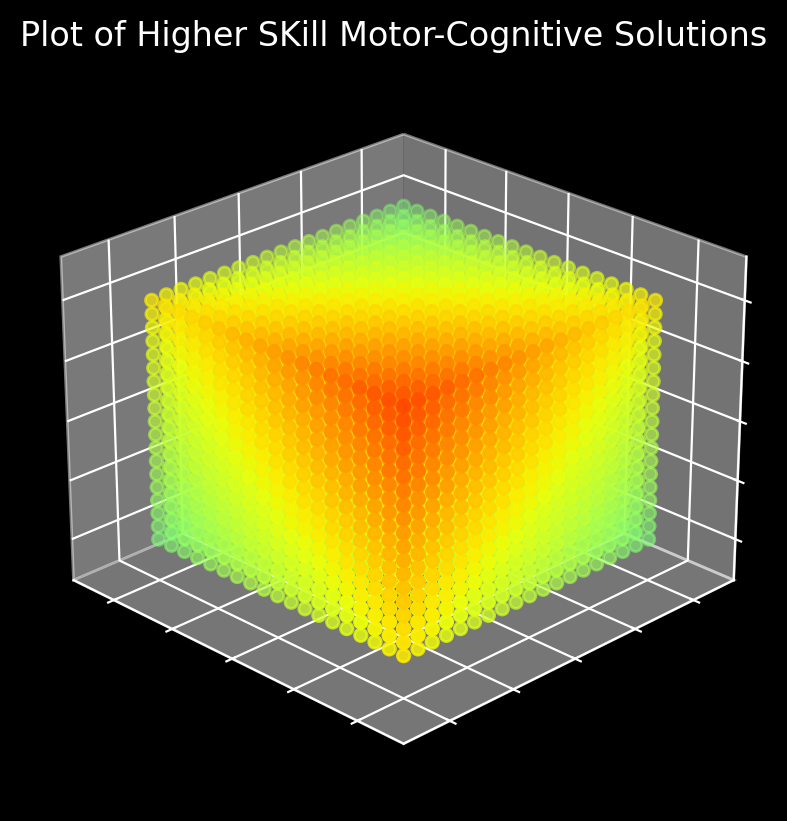

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from matplotlib.colors import ListedColormap

## The following code creates the figure plotting function
def MakePlot(xx,yy,zz,ww,cmapO=cm.jet): 
    ##Create Custom Colormap with Alpha varying depending on the functions behavior. 
    ## This produces very nice isovolume plots similar to Mayavi and OpenCV
    
    ##Preallocate new colormap
    my_cmapN=cmapO(np.arange(cmapO.N))
    
    #set Alpha of new colormap to be small in the middle of the colormap range using a bump function
    # this can be changed to emphasize different areas of the range that are of interest.   
    nA=cmapO.N    
    xA=np.linspace(-7,7,nA)
    epsilon=1 #Width of range to exclude from alpha channel
    x_0=1#Center of range to exclude from alpha channel
    
    def f_AlphaControl(x):
        u=(x-x_0)/epsilon
        return 1-np.exp(-u**2/(1-u**2))*(np.abs(u)<1.)

    yA=f_AlphaControl(xA) 
    #plt.plot(xA,f_AlphaControl(xA))
    #plt.xlim([-1,1])
    #plt.ylim([-1,1])
   
    my_cmapN[:,3]=yA
    
    fig = plt.figure(dpi=300) 
    
   # Create new colormap with red for positive values and blue for negative values
    my_cmap = ListedColormap(my_cmapN)
    # Compute color values based on sum of x and y coordinates
    colors = xx + yy + zz + ww
    
    # Define colormap range centered at zero
    vmin = -max(abs(colors))
    vmax = max(abs(colors))
    center = 0
    
    # Create colormap that goes from dark colors to bright colors using the 'jet' colormap
    my_cmap = cm.get_cmap('jet')

    # Normalize the colors to the range [0, 1]
    norm = cm.colors.Normalize(vmin=-1, vmax=1)
    colors_scaled = norm(colors)

    # Map negative x, y, and z values to cooler colors
    for i in range(len(xx)):
        if xx[i] < 0 and yy[i] < 0 and zz[i] < 0:
            colors_scaled[i] = - 0.5 * abs(colors_scaled[i])
    
    plt.style.use('dark_background')
    fig = plt.figure(dpi=200) 
    ax = fig.add_subplot(projection='3d')
    points = ax.scatter(xx,yy,zz,c=colors_scaled,cmap=my_cmap, vmin=vmin, vmax=vmax)   

    
    #cbar.set_alpha(.2)
    #cbar.draw_all()
    
    ## Make Title for plot
    ax.set_title(r'Plot of Higher SKill Motor-Cognitive Solutions')
      
    ##Plot x, y, and z axis useful for visual referencing when viewing the plot
    eps=.3
    #tt=np.linspace(-(1+eps)*L,(1+eps)*L,2)
    #ax.plot(tt,0*tt,0*tt,c='black',linewidth=2);
    #ax.plot(0*tt,tt,0*tt,c='black',linewidth=2);
    #ax.plot(0*tt,0*tt,tt,c='black',linewidth=2)
      
    ## Set viewing angle
    xang=-45;pang=25;
    ax.view_init(pang, xang)
    
    # Set axis limits
    ax.set_xlim([-(1+eps)*L,(1+eps)*L]);ax.set_ylim([-(1+eps)*L,(1+eps)*L]);ax.set_zlim([-(1+eps)*L,(1+eps)*L]);
    ax.invert_yaxis() # Reverse the y-axis

    ax.tick_params(labelbottom=False, labeltop=False, labelleft=False, labelright=False)

    # Add grid
    ax.grid(True)
    
    # save figure
    #plt.savefig("test2_skill_conceptual_cube.png",dpi=300)

if __name__ == "__main__":

    #Set Plot Grid 
    
    L=1
    x_C=0.0;y_C=0.0;z_C=0.0;
    # Set XYZ Plotting Grid
    a1=x_C-L;b1=x_C+L; # dividing by 2 creates a smaller cube
    a2=y_C-L;b2=y_C+L;
    a3=z_C-L;b3=z_C+L;
    
    n=19;
    NT=n**3
    
    
    
    ##The following if statement determines whether you want to use a random grid R=1 
    ## or a uniform grid R=0
    
    grid_flag=1
    
    if grid_flag==0:
       ## Random Grid
       xx=np.random.uniform(a1,b1,NT);
       yy=np.random.uniform(a2,b2,NT);
       zz=np.random.uniform(a3,b3,NT)
    else:
        ## Even Grid
        x = np.linspace(a1,b1,n);
        y = np.linspace(a2,b2,n);
        z = np.linspace(a3,b3,n);
    
        X, Y, Z = np.meshgrid(x, y, z, indexing='ij', sparse=False)
        
        xx=X.reshape(X.size);yy=Y.reshape(Y.size);zz=Z.reshape(Z.size);
    
    
    
    ## The following code defines the function of 3 variables that we wish to visualize
    ## This can be replaced with the flattened data array that you wish to plot
    
    def f(x,y,z):
        return x*y*z*np.exp(-(x**2+y**2+z**2))
    
    ww=f(xx,yy,zz)
    ww[np.isinf(ww)]=np.nan
    
  
    MakePlot(xx,yy,zz,ww)
    plt.show()

C:\Users\Cade\AppData\Local\Temp\ipykernel_16412\3532485019.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_cmap = cm.get_cmap('jet')


<Figure size 1920x1440 with 0 Axes>

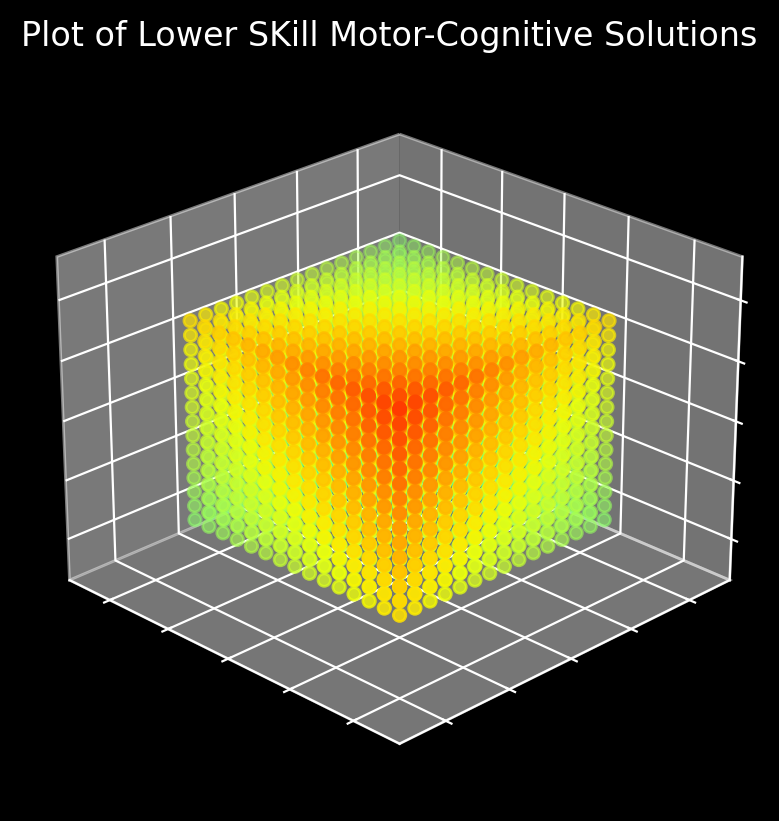

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from matplotlib.colors import ListedColormap

## The following code creates the figure plotting function
def MakePlot(xx,yy,zz,ww,cmapO=cm.jet): 
    ##Create Custom Colormap with Alpha varying depending on the functions behavior. 
    ## This produces very nice isovolume plots similar to Mayavi and OpenCV
    
    ##Preallocate new colormap
    my_cmapN=cmapO(np.arange(cmapO.N))
    
    #set Alpha of new colormap to be small in the middle of the colormap range using a bump function
    # this can be changed to emphasize different areas of the range that are of interest.   
    nA=cmapO.N    
    xA=np.linspace(-7,7,nA)
    epsilon=1 #Width of range to exclude from alpha channel
    x_0=1#Center of range to exclude from alpha channel
    
    def f_AlphaControl(x):
        u=(x-x_0)/epsilon
        return 1-np.exp(-u**2/(1-u**2))*(np.abs(u)<1.)

    yA=f_AlphaControl(xA) 
    #plt.plot(xA,f_AlphaControl(xA))
    #plt.xlim([-1,1])
    #plt.ylim([-1,1])
   
    my_cmapN[:,3]=yA
    
    fig = plt.figure(dpi=300) 
    
   # Create new colormap with red for positive values and blue for negative values
    my_cmap = ListedColormap(my_cmapN)
    # Compute color values based on sum of x and y coordinates
    colors = xx + yy + zz + ww
    
    # Define colormap range centered at zero
    vmin = -max(abs(colors))
    vmax = max(abs(colors))
    center = 0
    
    # Create colormap that goes from dark colors to bright colors using the 'jet' colormap
    my_cmap = cm.get_cmap('jet')

    # Normalize the colors to the range [0, 1]
    norm = cm.colors.Normalize(vmin=-1, vmax=1)
    colors_scaled = norm(colors)

    # Map negative x, y, and z values to cooler colors
    for i in range(len(xx)):
        if xx[i] < 0 and yy[i] < 0 and zz[i] < 0:
            colors_scaled[i] = - 0.5 * abs(colors_scaled[i])
    
    plt.style.use('dark_background')
    fig = plt.figure(dpi=200) 
    ax = fig.add_subplot(projection='3d')
    points = ax.scatter(xx,yy,zz,c=colors_scaled,cmap=my_cmap, vmin=vmin, vmax=vmax)   

    
    #cbar.set_alpha(.2)
    #cbar.draw_all()
    
    ## Make Title for plot
    ax.set_title(r'Plot of Lower SKill Motor-Cognitive Solutions')
      
    ##Plot x, y, and z axis useful for visual referencing when viewing the plot
    eps=.3
    #tt=np.linspace(-(1+eps)*L,(1+eps)*L,2)
    #ax.plot(tt,0*tt,0*tt,c='black',linewidth=2);
    #ax.plot(0*tt,tt,0*tt,c='black',linewidth=2);
    #ax.plot(0*tt,0*tt,tt,c='black',linewidth=2)
      
    ## Set viewing angle
    xang=-45;pang=25;
    ax.view_init(pang, xang)
    
    # Set axis limits
    ax.set_xlim([-(1+eps)*L,(1+eps)*L]);ax.set_ylim([-(1+eps)*L,(1+eps)*L]);ax.set_zlim([-(1+eps)*L,(1+eps)*L]);
    ax.invert_yaxis() # Reverse the y-axis

    ax.tick_params(labelbottom=False, labeltop=False, labelleft=False, labelright=False)

    # Add grid
    ax.grid(True)
    
    # save figure
    #plt.savefig("test2_skill_conceptual_cube.png",dpi=300)

if __name__ == "__main__":

    #Set Plot Grid 
    
    L=1
    x_C=0.0;y_C=0.0;z_C=0.0;
    # Set XYZ Plotting Grid
    a1=x_C-L/1.2;b1=x_C+L/1.2; # dividing by 2 creates a smaller cube
    a2=y_C-L/1.2;b2=y_C+L/1.2;
    a3=z_C-L/1.2;b3=z_C+L/1.2;
    
    n=15;
    NT=n**3
    
    
    
    ##The following if statement determines whether you want to use a random grid R=1 
    ## or a uniform grid R=0
    
    grid_flag=1
    
    if grid_flag==0:
       ## Random Grid
       xx=np.random.uniform(a1,b1,NT);
       yy=np.random.uniform(a2,b2,NT);
       zz=np.random.uniform(a3,b3,NT)
    else:
        ## Even Grid
        x = np.linspace(a1,b1,n);
        y = np.linspace(a2,b2,n);
        z = np.linspace(a3,b3,n);
    
        X, Y, Z = np.meshgrid(x, y, z, indexing='ij', sparse=False)
        
        xx=X.reshape(X.size);yy=Y.reshape(Y.size);zz=Z.reshape(Z.size);
    
    
    
    ## The following code defines the function of 3 variables that we wish to visualize
    ## This can be replaced with the flattened data array that you wish to plot
    
    def f(x,y,z):
        return x*y*z*np.exp(-(x**2+y**2+z**2))
    
    ww=f(xx,yy,zz)
    ww[np.isinf(ww)]=np.nan
    
  
    MakePlot(xx,yy,zz,ww)
    plt.show()